МАП221С

Глазкова Александра

# **Итоговый отчет по дисциплине «Анализ данных и машинное обучение»**

Анализ набора данных, касающихся объявлений, размещенных на площадке Airbnb в Новом Орлеане, США

# **1. Введение**

Анализ набора данных датасета [«New Orleans Airbnb Listings and Reviews»](https://www.kaggle.com/datasets/ruthgn/new-orleans-airbnb-listings-and-reviews), представленный в исследовании, дает описание некоторым наблюдениям, связанным с предоставлением услуг онлайн-площадкой Airbnb в Новом Орлеане, США в 2021 году.
Отчет содержит поэтапное рассмотрение операций, связанных с предварительной обработкой данных, созданием инженерных функций и детальным анализом распределений и коэффициентов наиболее важных переменных. 

# **2. О датасете**

Выбранный датасет хранит в себе информацию об активности пользователей на онлайн-площадке Airbnb, связанной с объявлениями о сдаче жилья в Новом Орлеане, США.

В набор данных, который был размещен на платформе Kaggle в ноябре 2021 года, входит 2 файла: 
*   new_orleans_airbnb_listings.csv, содержащий объявления, включая полные описания и среднюю оценку отзывов;
*   reviews.csv, содержащий отзывы, включая уникальный идентификатор каждого рецензента и подробные комментарии.



# **3. Определение задачи исследования**

Анализ данных должен помочь ответить на следующие вопросы:
*   Какой категории пользователей извлеченная информация будет интересна?
*   Какое значение будут иметь полученные результаты для каждой заинтересованной группы лиц?

После составления небольшого обзора на датасет были сформулированы задачи, которые можно представить следующим образом, как это показано ниже.

**Основная цель | Изучение полезной информации через поиск ответов на значимые вопросы**

  *   Данные, касающиеся постояльцев
*   В каком районе города будет лучше всего остановиться?
*   Какой район города лучше всего подходит для проживания, если учитывать соотношение цена/рейтинг?


  *   Данные, касающиеся Airbnb
*   Какие районы города должны рассматриваться компанией в первую очередь для их продвижения?
*   Какой вариант размещения должен активнее продвигаться компанией?





# **4. Импорт библиотек и загрузка данных**

Прежде чем начать работу с данными, нужно импортировать необходимые библиотеки и сами данные.

In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from pandas.api.types import is_numeric_dtype
from datetime import datetime
import shap
import time

In [4]:
# Импорт набора данных
nol_data = pd.read_csv("/new_orleans_airbnb_listings.csv")

In [5]:
# Число уникальных атрибутов, которые есть в файле
len(set(list(nol_data.columns)))

49

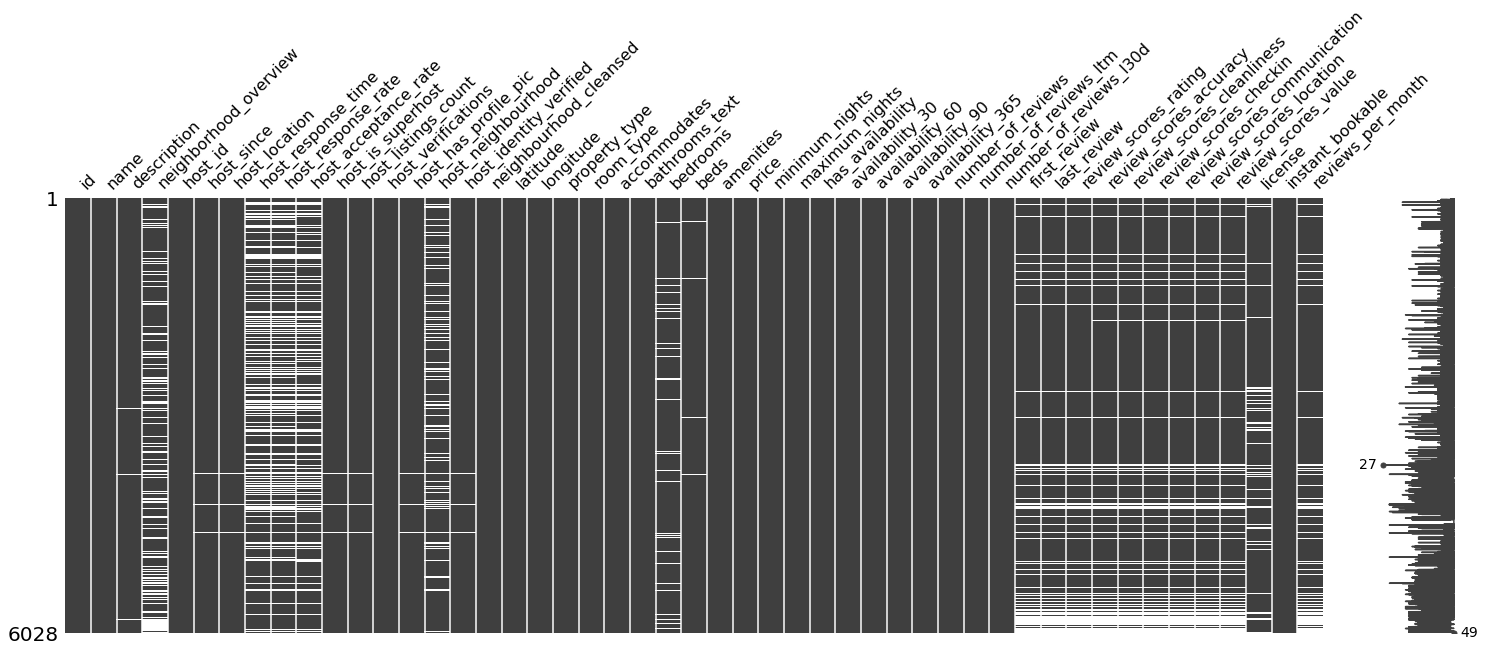

In [6]:
# Визуализация недостающих значений в наборе данных
msno.matrix(nol_data, figsize=(25, 8))

In [7]:
# Удаление неиспользуемых атрибутов
for dataset in [nol_data]:
    for atr in dataset.columns:
        nan_ratio = dataset[atr].isnull().sum()/len(nol_data)
        if (nan_ratio > 0.95):
            dataset.drop(atr, axis=1, inplace=True)

In [8]:
# Удаление информации, которая не будет полезна для достижения поставленных задач
nol_data_pd = nol_data.drop(['description', 'neighborhood_overview','host_id', 'host_location', 'host_is_superhost',
                             'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_neighbourhood',
                             'host_identity_verified', 'latitude', 'longitude', 'bathrooms_text', 'bedrooms', 'amenities',
                             'beds', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60',
                             'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                             'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'license', 'instant_bookable', 'reviews_per_month'],
                            axis=1, inplace=True)

In [9]:
nol_data.head()

,id,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,price,availability_90,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value
0,19091,Fully Furnished Cozy Apartment,2010-01-23,within an hour,100%,100%,Leonidas,Entire rental unit,Entire home/apt,3,$67.00,34,474,4.89,4.67,4.91
1,26834,Maison Mandeville in the Marigny,2010-04-27,within a day,100%,81%,Marigny,Entire residential home,Entire home/apt,2,$129.00,0,263,4.96,4.93,4.90
2,71624,Ravenwood Manor (Historic Bywater),2011-01-29,within an hour,100%,91%,Bywater,Entire rental unit,Entire home/apt,2,$130.00,68,242,4.94,4.80,4.90
3,74498,Maison Marais 1: Large Local Living,2011-02-14,within an hour,100%,95%,St. Roch,Entire rental unit,Entire home/apt,2,$98.00,52,515,4.90,4.64,4.85
4,79536,FeelAtHomeInNO PrivateApt,2011-03-07,within an hour,100%,94%,Seventh Ward,Entire rental unit,Entire home/apt,2,$72.00,0,519,4.86,4.43,4.85


Теперь данные готовы к использованию на следующих этапах анализа.

В ближайших разделах отчета будут приведены ответы на вопросы, обозначенные ранее.

# **5. Данные, касающиеся постояльцев**

Можно выдвинуть предположение о том, что тем, кто находится в поиске временного или постоянного жилья, в первую очередь необходимо узнать как можно больше информации о районе города, в котором они планируют остановиться. В зависимости от обстоятельств на их выбор места проживания могут оказывать влияние различные факторы, такие как стоимость размещения, репутация квартала, расположение дома относительно центра города. 

### **5.1 В каком районе города будет лучше всего остановиться?**

Из чего складывается хорошая репутация района? У нас не так много информации о самих районах, но можно сделать вывод о том, насколько они хороши, на основе индексируемых показателей.

Наиболее заметный атрибут, который должен учитываться при решении этой задачи, — это review_score_location. Он дает представление о том, что люди думают об окрестностях места, в котором можно остановиться на некоторое время. Также среди рассматриваемых атрибутов для изучения стоит выделить review_score_rating (рейтинговая оценка жилья) и host_since. Последний атрибут может быть интересен гостям, которые при выборе руководствуются в большей степени мерами безопасности и боятся оказаться втянутыми в аферу. Так как принято считать, что опытные арендодатели более надежны, есть причины обратить внимание на те объявления, авторы которых зарабатывают на сдаче жилья давно. Поскольку нет возможности удостовериться в точности значений атрибутов, характеризующих репутацию района, стоит отказаться от добавления к анализу значений других характеристик, которые могут привести к искажению результатов.

Далее будет рассматриваться атрибут — review_score_location.

В начале необходимо провести группировку наблюдений по районам города. Следующим шагом должно быть произведено вычисление среднего значения показателя review_score_location. После производится сортировка.

In [10]:
# Выбор необходимого атрибута, группировка по району, определение среднего значения
fht_data = nol_data[['neighbourhood_cleansed','review_scores_location']].groupby(['neighbourhood_cleansed']).mean()
fht_data = fht_data.sort_values(by=['review_scores_location'], ascending=False)
sliced_fht_data = fht_data.head(20)

In [11]:
# Обзор 20 районов, упорядоченных по среднему значению оценки местоположения
sliced_fht_data

,review_scores_location
neighbourhood_cleansed,
Lakeshore - Lake Vista,5.000000
Garden District,4.982917
Touro,4.967576
City Park,4.943269
Audubon,4.943021
Uptown,4.942784
French Quarter,4.938828
Irish Channel,4.935354
Lakeview,4.933125


Для большей наглядности можно отобразить результаты на гистограмме, чтобы лучше рассмотреть разницу между оценками.

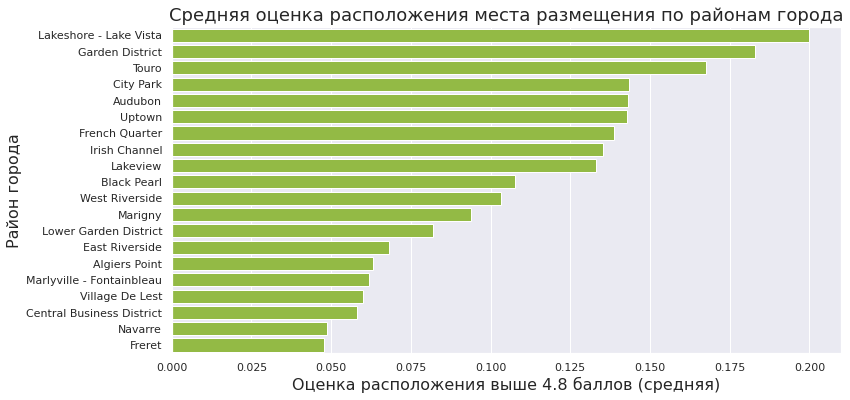

In [12]:
# Визуальное представление рассмотренных ранее данных
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(data=sliced_fht_data, x=sliced_fht_data['review_scores_location']-4.8, y=sliced_fht_data.index, color='yellowgreen')
ax.set_title("Средняя оценка расположения места размещения по районам города", fontsize=18)
plt.xlabel('Оценка расположения выше 4.8 баллов (средняя)', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Интересно, что районы, расположенные в центре города, имеют лучший средний балл за местоположение. Следом указаны те, которым можно тоже дать хорошую характеристику, но их нельзя отнести к центральным.

Теперь можно провести аналогичный обзор атрибута review_scores_rating.

In [13]:
# Выбор необходимого атрибута, группировка по району, определение среднего значения
fht_data_2 = nol_data[['neighbourhood_cleansed','review_scores_rating']].groupby(['neighbourhood_cleansed']).mean()
# Сортировка по среднему значению рейтинговой оценки
fht_data_2 = fht_data_2.sort_values(by=['review_scores_rating'], ascending=False)
sliced_fht_data_2 = fht_data_2.head(20)

In [14]:
# Просмотр 20 районов, упорядоченных по среднему значению рейтинговой оценки
sliced_fht_data_2

,review_scores_rating
neighbourhood_cleansed,
Lakeshore - Lake Vista,5.000000
Dixon,4.966667
Touro,4.917879
Audubon,4.902083
Lakeview,4.900000
City Park,4.897500
Navarre,4.893529
West Riverside,4.871341
Irish Channel,4.863737


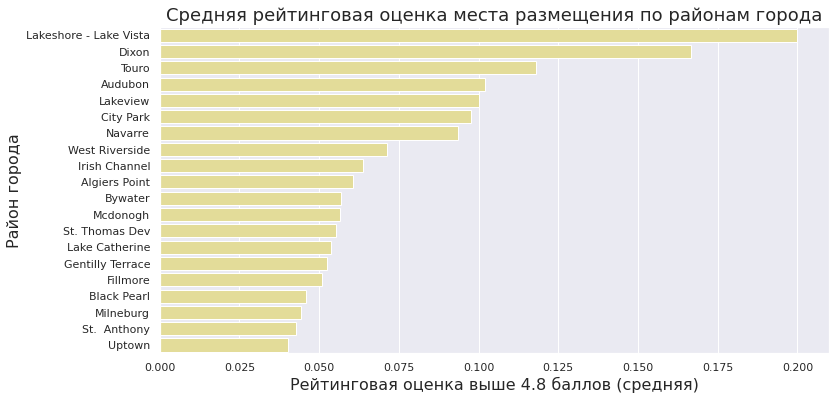

In [15]:
# Визуальное представление рассмотренных ранее данных
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(data=sliced_fht_data_2, x=sliced_fht_data_2['review_scores_rating']-4.8, y=sliced_fht_data_2.index, color='khaki')
ax.set_title("Средняя рейтинговая оценка места размещения по районам города", fontsize=18)
plt.xlabel('Рейтинговая оценка выше 4.8 баллов (средняя)', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Можно отметить лишь незначительные изменения, произошедшие в распределении мест. Однако следует иметь в виду, что этот способ количественной оценки того, насколько хорош район, менее точен, чем предыдущий, поэтому его следует рассматривать как дополнительный.

Далее будет рассматриваться атрибут — host_since.

Этот атрибут представляет собой наблюдения, содержащие дату. 

In [16]:
# Добавление нового атрибута, подсчитывающего разницу в днях между текущим моментом и датой начала деятельности в роли принимающей стороны
nol_data['days_host_since'] = pd.to_datetime(nol_data['host_since'], format='%Y-%m-%d')
nol_data['days_host_since'] = (pd.to_datetime('2018-12-06', format='%Y-%m-%d') - nol_data['days_host_since'])/ np.timedelta64(1, 'D')

In [17]:
# Выбор необходимого атрибута, группировка по району, определение среднего значения
fht_data_3 = nol_data[['neighbourhood_cleansed','days_host_since']].groupby(['neighbourhood_cleansed']).mean()
# Сортировка по среднему значению количества дней пребывания в роли принимающей стороны
fht_data_3 = fht_data_3.sort_values(by=['days_host_since'], ascending=False)
sliced_fht_data_3 = fht_data_3.head(19)

In [18]:
# Просмотр 19 районов, упорядоченных по среднему значению количества дней пребывания в роли принимающей стороны
sliced_fht_data_3

,days_host_since
neighbourhood_cleansed,
Black Pearl,1421.708333
Bywater,1293.529762
Pontchartrain Park,1235.000000
Marigny,1187.204134
St. Bernard Area,1174.900000
East Carrollton,1164.148148
Leonidas,1142.024590
Bayou St. John,1123.810000
Touro,1112.775000


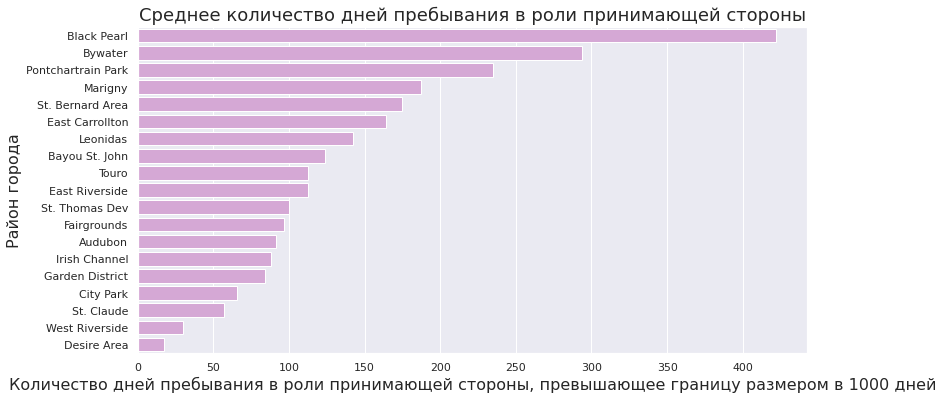

In [19]:
# Визуальное представление рассмотренных ранее данных
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(data=sliced_fht_data_3, x=sliced_fht_data_3['days_host_since']-1000, y=sliced_fht_data_3.index, color='plum')
ax.set_title("Среднее количество дней пребывания в роли принимающей стороны", fontsize=18)
plt.xlabel('Количество дней пребывания в роли принимающей стороны, превышающее границу размером в 1000 дней', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

В полученных данных можно наблюдать две крайности, связанных с опытом принимающей стороны. Самым высоким значением количества дней в рассматриваемой выборке является 1422 дня (3,3 года), самым низким — 1017 дней (2,3 года). Так что, если исходить из предположения, что опытные арендодатели более надежны, то особое внимание следует обратить на район Black Pearl.

Если необходимо учесть 3 переменных вместе, необходимо определиться с базовой пользовательской метрикой. В контексте решаемой задачи будет использована метрика Phi.

In [20]:
# Стандартизация атрибутов
fht_data_un = fht_data/fht_data['review_scores_location'][0]
fht_data_2_un = fht_data_2/fht_data_2['review_scores_rating'][0]
fht_data_3_un = fht_data_3/fht_data_3['days_host_since'][0]

In [21]:
# Определение нового блока данных и вычисление метрики Phi
phi_data = fht_data
phi_data['review_scores_location'] = 6*fht_data_un['review_scores_location'] + 2*fht_data_2_un['review_scores_rating'] + fht_data_3_un['days_host_since']
phi_data.rename(columns = {'review_scores_location':'Phi'}, inplace = True)

In [22]:
# Просмотр 20 районов и связанных с ними значений метрики Phi
phi_data = phi_data.sort_values(by=['Phi'], ascending=False)
sliced_phi_data = phi_data.head(20)
sliced_phi_data

,Phi
neighbourhood_cleansed,
Black Pearl,8.827636
Touro,8.710945
Audubon,8.660159
City Park,8.640631
Irish Channel,8.633048
Marigny,8.630634
Bywater,8.619955
Garden District,8.618815
West Riverside,8.556852


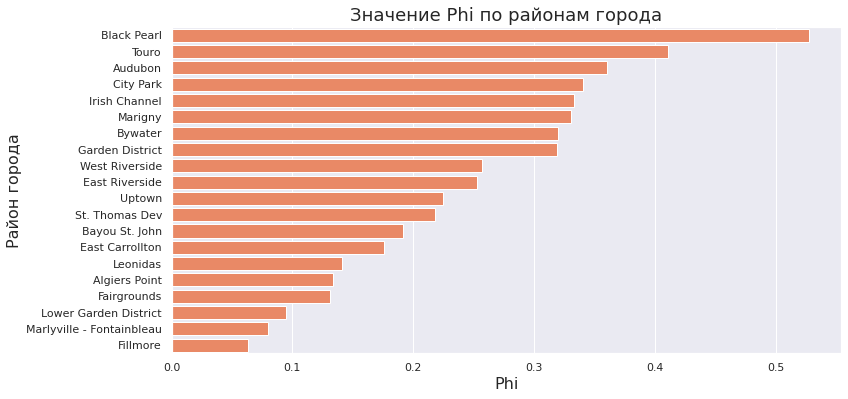

In [23]:
# Визуальное представление рассмотренных ранее данных
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(data=sliced_phi_data, x=sliced_phi_data['Phi']-8.3, y=sliced_phi_data.index, color='coral')
ax.set_title("Значение Phi по районам города", fontsize=18)
plt.xlabel('Phi', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Таким образом, опираясь на полученные значения метрики Phi, можно сделать вывод о том, что на статус идеального района для проживания может смело претендовать Black Pearl.

### **5.2 Какой район города лучше всего подходит для проживания, если учитывать соотношение цена/рейтинг?**

Еще одна информация, которая, несомненно, была бы полезна гостям, — какие варианты считаются одновременно лучшими, согласно рейтингам, и недорогими.

Рассчитать это относительно просто. Для этой цели понадобятся два атрибута: цена за ночь и рейтинг объявления.

In [24]:
def price_to_num(price):
    price = price[1:]
    if (len(price) < 8):
        return float(price)
    else:
        price = price[:-7] + price[-6:]
        return float(price)

In [25]:
nol_data['price'] = nol_data['price'].apply(price_to_num)

При расчете коэффициента числитель будет соответствовать рейтингу, а знаменатель — цене. Таким образом, чем выше коэффициент, тем лучше предложение, поскольку более высокий рейтинг и более низкая цена способствуют его повышению. 

Однако прежде чем рассчитать соотношение, необходимо получить более подробную информацию об этих переменных и проверить их на наличие искажений, например, отрицательных или нулевых цен.

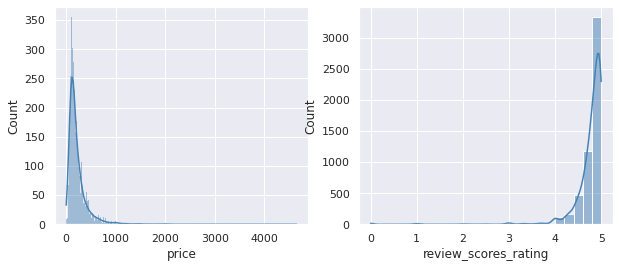

In [26]:
# Добавление гистограмм по стоимости и рейтингу
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=nol_data, x="price", kde=True, color="steelblue", binwidth=10, ax=axs[0])
sns.histplot(data=nol_data, x="review_scores_rating", kde=True, color="steelblue", binwidth=0.2, ax=axs[1])
plt.show()

In [27]:
nol_data['review_scores_rating'].describe()

count    5356.000000
mean        4.770147
std         0.395421
min         0.000000
25%         4.710000
50%         4.860000
75%         4.960000
max         5.000000
Name: review_scores_rating, dtype: float64

In [28]:
nol_data['price'].describe()

count    6028.000000
mean      225.361314
std       235.789359
min         0.000000
25%       105.000000
50%       158.000000
75%       258.000000
max      4657.000000
Name: price, dtype: float64

In [29]:
nol_data[nol_data.price == 0].shape[0]

9

In [30]:
nol_data = nol_data[nol_data.price != 0]

In [31]:
nol_data['price'].describe()

count    6019.000000
mean      225.698289
std       235.804369
min        11.000000
25%       105.000000
50%       158.000000
75%       259.000000
max      4657.000000
Name: price, dtype: float64

In [32]:
nol_data[nol_data.review_scores_rating == 0].shape[0]

13

In [33]:
nol_data = nol_data[nol_data.review_scores_rating != 0]

In [34]:
nol_data['review_scores_rating'].describe()

count    5341.000000
mean        4.782172
std         0.316438
min         1.000000
25%         4.710000
50%         4.860000
75%         4.960000
max         5.000000
Name: review_scores_rating, dtype: float64

Теперь есть возможность вычислить коэффициент соотношения.

In [35]:
nol_data['coefRP'] = nol_data['review_scores_rating']/nol_data['price']

In [36]:
nol_data['coefRP'].describe()

count    5341.000000
mean        0.035509
std         0.025267
min         0.001449
25%         0.018812
50%         0.030903
75%         0.046471
max         0.454545
Name: coefRP, dtype: float64

Ниже представлены 8 первых наблюдений, упорядоченных по соотношению рейтинг/цена. Отображаются только название, id, цена и рейтинг.

In [37]:
nol_data[nol_data['coefRP']>0.2][['name', 'id', 'price', 'review_scores_rating','coefRP']].sort_values(by=['coefRP'], ascending=False)

,name,id,price,review_scores_rating,coefRP
2597,Simple and comfy: Mid-city room in great location,28199493,11.0,5.0,0.454545
5075,*1636ft²*Parking*940Mbps*Smart TV*Full Kitchen,48256894,14.0,5.0,0.357143
4925,Full Kitchen-W/D-20min→Airport-Smart TV-940Mbps,47404304,15.0,5.0,0.333333
5081,*Self Check-In*1636ft²*940Mbps*A/C*10min→Airport,48285982,14.0,4.5,0.321429
3705,The French Quarter begins at this Resort,38922774,16.0,5.0,0.312500
4927,5min→Mercedes-Benz Superdome-A/C-Self Check-In,47407201,16.0,5.0,0.312500
5078,*Smart TV*A/C*W/D*Full Kitchen*940Mbps*1636ft²,48272416,16.0,5.0,0.312500
4924,"Upscale, Safe and Secluded Lakefront Neighborhood",47403514,24.0,5.0,0.208333


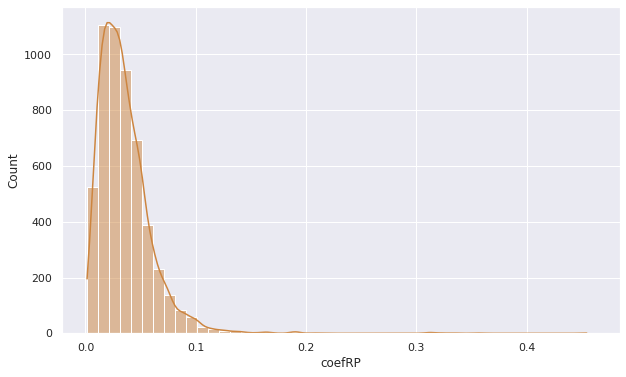

In [38]:
# Визуальное представление рассмотренных ранее данных
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=nol_data, x="coefRP", kde=True, color="peru", binwidth=0.01)

Как можно заметить, самое первое наблюдение имеет значительно превосходящий по значению коэффициент 0,45, но относящаяся к нему указанная цена очень подозрительна и составляет всего 11 долларов за ночь. По этой причине необходимо дополнить данные количеством отзывов, чтобы подкрепить уверенность в получаемых результатах.

Например, если мы добавим количество отзывов к предыдущей таблице, то получим следующее.

In [39]:
nol_data[nol_data['coefRP']>0.2][['name','id','price', 'review_scores_rating','coefRP','number_of_reviews']].sort_values(by=['coefRP'], ascending=False)

,name,id,price,review_scores_rating,coefRP,number_of_reviews
2597,Simple and comfy: Mid-city room in great location,28199493,11.0,5.0,0.454545,27
5075,*1636ft²*Parking*940Mbps*Smart TV*Full Kitchen,48256894,14.0,5.0,0.357143,1
4925,Full Kitchen-W/D-20min→Airport-Smart TV-940Mbps,47404304,15.0,5.0,0.333333,1
5081,*Self Check-In*1636ft²*940Mbps*A/C*10min→Airport,48285982,14.0,4.5,0.321429,2
3705,The French Quarter begins at this Resort,38922774,16.0,5.0,0.312500,1
4927,5min→Mercedes-Benz Superdome-A/C-Self Check-In,47407201,16.0,5.0,0.312500,2
5078,*Smart TV*A/C*W/D*Full Kitchen*940Mbps*1636ft²,48272416,16.0,5.0,0.312500,1
4924,"Upscale, Safe and Secluded Lakefront Neighborhood",47403514,24.0,5.0,0.208333,3


Теперь можно по новому посмотреть на первые позиции. Для многих из этих, казалось бы, хороших мест проживания было оставлено менее 3 отзывов.

Далее представлен рассчет коэффициента соотношения, который будет учитывать количество отзывов помимо ранее используемых значений.

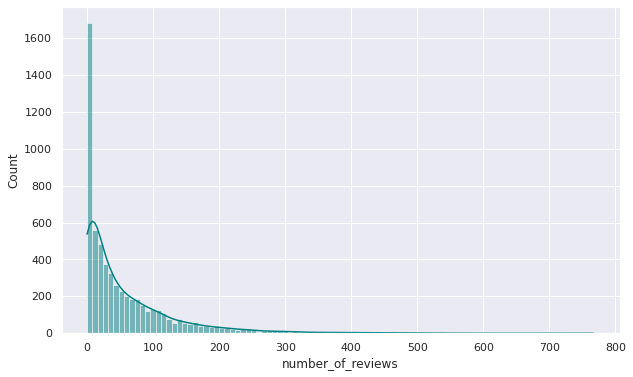

In [40]:
# Добавление гистограмм по атрибуту «number_of_reviews»
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=nol_data, x="number_of_reviews", kde=True, color="teal", binwidth=8)

In [41]:
nol_data['coefQRP'] = nol_data['coefRP']*nol_data['number_of_reviews']

Ниже представлен обновленная оценка 8 первых наблюдений, упорядоченных по соотношению рейтинг/цена. Отображаются только название, id, цена и рейтинг.

In [42]:
nol_data[nol_data['coefQRP']>40][['name','id', 'price', 'review_scores_rating', 'number_of_reviews', 'coefQRP']].sort_values(by=['coefQRP'], ascending=False)

,name,id,price,review_scores_rating,number_of_reviews,coefQRP
868,Quirky Room in Historic St. Roch,12866972,35.0,4.84,401,55.452571
1884,Cute Studio Guest House near City Park,22051922,45.0,4.69,502,52.319556
1511,Stylish Design Hostel - 1 Bed in 4 Bed Shared ...,18413909,46.0,4.69,487,49.652826
7,"Frenchmen House ""Red Room""",80869,75.0,4.79,766,48.921867
255,Separate entrance & private porch in Bywater,3003879,51.0,4.60,540,48.705882
430,5 Star Nu’Orleans Cottage 7 - Minutes To Downtown,5637381,67.0,4.82,660,47.480597
13,"Frenchmen House ""Rose Room""",183207,79.0,4.82,720,43.929114
1115,Tiny House Big Easy Living Mins to FQ 20-RTR-2...,15613263,48.0,4.83,407,40.954375


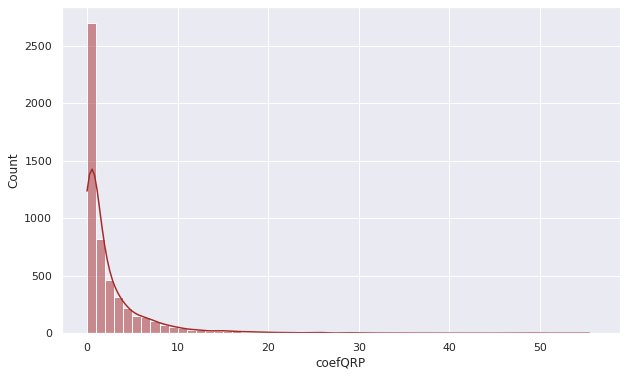

In [43]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=nol_data, x="coefQRP", kde=True, color="brown", binwidth=1)

Если взглянуть на 8 верхних позиций, то по-прежнему можно заметить относительно низкие цены и высокие рейтинги. При этом эти наблюдения имеют гораздо большее количество отзывов, что может быть положительно оценено с позиции надежности гипотетическими постояльцами.

### **5.3 Предложения и рекомендации, касающиеся постояльцев**

Обобщая результаты ответов на вопросы данного раздела, можно сформулировать предложения и рекомендации для гостей, заинтересованных в поиске места проживания в Новом Орлеане.

**Хорошее месторасположение**

На основании оценок местоположения жилья, данных пользователями, тремя лучшими районами являются Lakeshore - Lake Vista (в среднем 5), Garden District (в среднем 4.98) и Touro (4.97).

**Смешанная метрика**

Приведенные выше результаты совпадают с пользовательской смешанной метрикой, которая учитывает не только рейтинги мест, но и общий рейтинг, а также опыт арендадателя.

**Соотношение Рейтинг/Цена**

Опираясь на соотношение Рейтинг/Цена возможно отсортировать места проживания и определить несколько оптимальных вариантов. Три лучших варианта: «Simple and comfy: Mid-city room…» (ID: 28199493), «*1636ft²*Parking*940Mbps*Smart…» (ID: 48256894) и «Full Kitchen-W/D-20min→Airport…» (ID: 47404304).

**Соотношение Отзывы и Рейтинг/Цена**

Можно воспользоваться дополнительным коэффициентом соотношения, а именно таким, который будет учитывать еще и количество отзывов. С помощью этого коэффициента можно отсортировать варианты размещения и получить хорошие результаты с большим количеством отзывов. Эти наблюдения будут интересны тем гостям, кому в первую очередь важна надежность. В тройку лучших вошли «Quirky Room in Historic St. Roch» (ID: 12866972), «Cute Studio Guest House near City Park» (ID: 22051922) и «Stylish Design Hostel - 1 Bed in…» (ID: 18413909).

**Средняя цена**

Средняя цена за проживание в Новом Орлеане составляет около $225. Этим знанием можно воспользоваться для сравнения цен.

# 6. Данные, касающиеся Airbnb

Airbnb — это компания, а компании стремятся к росту. Когда мы говорим о росте применительно к компании, то обычно подразумеваем экономический рост, а именно, прибыль. В этом разделе будут рассмотрены факторы, оказывающие влияние на рост компании и увеличение дохода.

Цель компании, если не вдаваться в детали, заключается в активном продвижении опыта проживания «как дома» вдали от дома. Чем больше людей регулярно пользуется сервисами платформы по съему и предоставлению жилья, тем больше заработок компании.

### **6.1 Какие районы города должны рассматриваться компанией в первую очередь для их продвижения ?**

Представим, что Airbnb хочет провести рекламную кампанию и должна сделать выбор в пользу некоторого числа районов Нового Орлеана. В связи с этим возникает закономерный вопрос: где она должна быть размещена? Именно на него я постараюсь ответить в данном разделе.

Общей стратегией при поиске ответа на этот вопрос будет проверка среднего значения наличия предложений в каждом районе. Низкая доступность может означать, что многие стремятся забронировать жилье в этом районе. В таких условиях продвижение объявлений в этом районе, скорее всего, приведет к тому, что больше людей воспользуются Airbnb. Если сравнивать с размещением рекламы в случайных районах, то в данном случае будет наблюдаться более положительный эффект.

Прежде чем приступить к расчетам, необходимо провести предварительный анализ данных и определить переменные, которые представляют для нас больший интерес.

In [44]:
len(nol_data['neighbourhood_cleansed'].unique())

67

Определение количества объявлений, которое приходится на один район.

In [45]:
dist_data = nol_data.pivot_table(columns=['neighbourhood_cleansed'], aggfunc='size').sort_values(ascending=False)
dist_data

neighbourhood_cleansed
Central Business District    839
Central City                 503
Treme - Lafitte              386
Marigny                      385
Seventh Ward                 374
                            ... 
New Aurora - English Turn      3
Dixon                          3
U.S. Naval Base                2
Read Blvd West                 2
B. W. Cooper                   1
Length: 67, dtype: int64

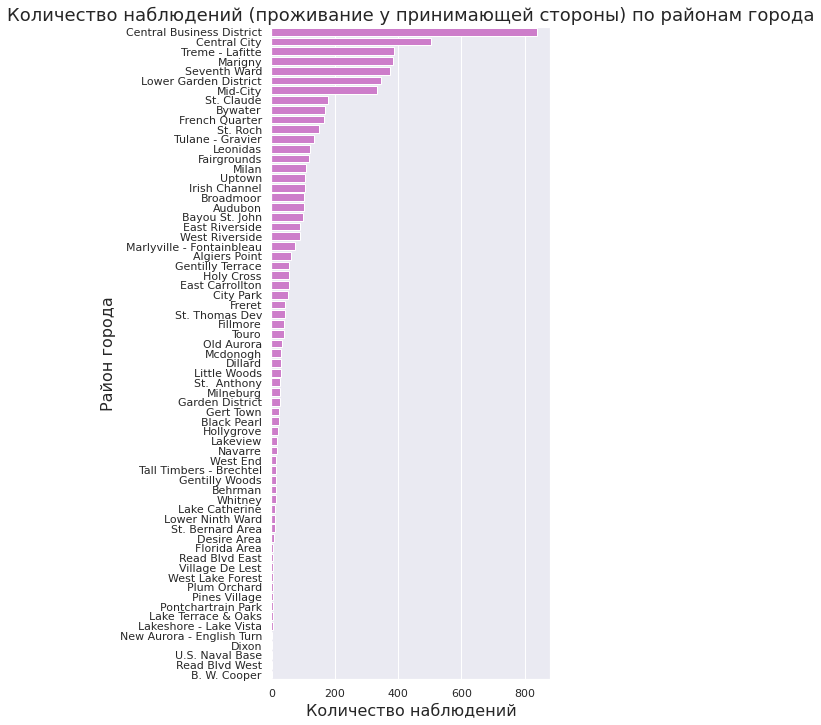

In [46]:
sns.set(rc={'figure.figsize':(5,12)})
ax = sns.barplot(x=list(dist_data.values), y=list(dist_data.index), color='orchid')
ax.set_title("Количество наблюдений (проживание у принимающей стороны) по районам города", fontsize=18)
plt.xlabel('Количество наблюдений', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Видно, что количество объявлений в каждом районе распределено неоднородно. Некоторые районы имеют в 10-30 раз больше наблюдений, чем другие. В этой связи можно выделить Central Business District как район, который превосходит по значению показателя остальных, и, с другой стороны, B. W. Cooper как район, который всем уступает.

Что касается доступности, для изучения следует использовать, например, availability_90, который является атрибутом, определяющим период доступа к объявлению, начиная со дня получения данных и на 90 дней вперед.

In [47]:
nol_data['availability_90'].describe()

count    6006.000000
mean       47.707626
std        30.624569
min         0.000000
25%        21.000000
50%        55.000000
75%        74.000000
max        90.000000
Name: availability_90, dtype: float64

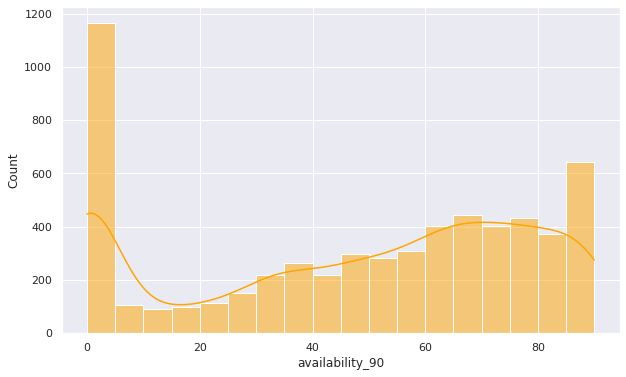

In [48]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=nol_data, x="availability_90", kde=True, color="orange", binwidth=5)

In [49]:
m90_data = nol_data[['neighbourhood_cleansed','availability_90']].groupby(['neighbourhood_cleansed']).mean().sort_values(by=['availability_90'], ascending=False)
m90_data

,availability_90
neighbourhood_cleansed,
Pontchartrain Park,82.200000
B. W. Cooper,80.000000
West Lake Forest,76.500000
Read Blvd West,67.500000
Pines Village,66.400000
...,...
Black Pearl,32.000000
St. Bernard Area,31.500000
City Park,30.673077


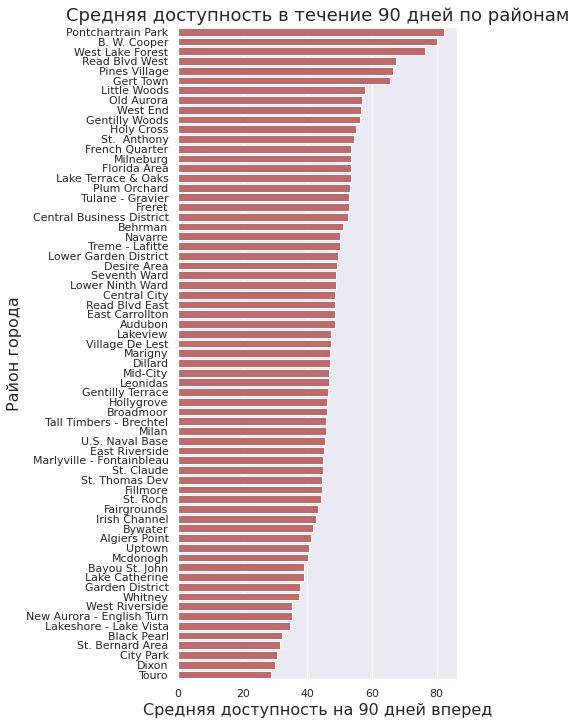

In [50]:
sns.set(rc={'figure.figsize':(5,12)})
ax = sns.barplot(x=m90_data['availability_90'], y=list(m90_data.index), color='indianred')
ax.set_title("Средняя доступность в течение 90 дней по районам", fontsize=18)
plt.xlabel('Средняя доступность на 90 дней вперед', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Видно, что есть некоторые районы, доступность которых в среднем в два раза выше, чем в других районах. Это уже "хорошо обслуживаемые" районы, и необходимо сосредоточиться на тех, которые имеют низкую доступность, как например Touro.

Однако прежде чем принять решение, возможно, есть смысл в том, чтобы обратить внимание на среднюю цену в этом районе. Если у нас есть два района с одинаковой средней доступностью, но во втором районе средняя цена выше, то, вероятно, Airbnb будет интереснее продвигать объявления в последнем районе, чем в первом.

Далее необходимо посмотреть, какова средняя цена по районам на жилье для 3 человек.

In [51]:
res3_data = nol_data[nol_data['accommodates']==3]
m_res3_data = res3_data[['neighbourhood_cleansed','price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by=['price'], ascending=False)
m_res3_data

,price
neighbourhood_cleansed,
French Quarter,267.250000
Seventh Ward,201.384615
Central Business District,173.100000
Touro,154.000000
Uptown,148.833333
Tulane - Gravier,148.333333
East Riverside,148.333333
Fairgrounds,142.833333
Marigny,136.882353


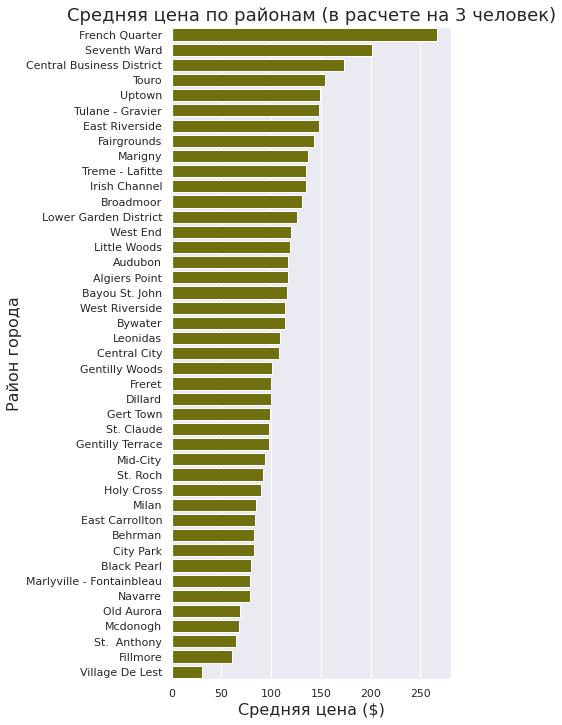

In [52]:
sns.set(rc={'figure.figsize':(5,12)})
ax = sns.barplot(x=m_res3_data['price'], y=list(m_res3_data.index), color='olive')
ax.set_title("Средняя цена по районам (в расчете на 3 человек)", fontsize=18)
plt.xlabel('Средняя цена ($)', fontsize=16)
plt.ylabel('Район города', fontsize=16)
plt.show()

Неудивительно, что центральные районы дороже. В самом дешевом районе жилье в среднем более чем в 2 раза дешевле жилья в самом дорогом районе.

In [53]:
m90Price = m90_data
m90Price['avPrice'] = m_res3_data['price']

In [54]:
m90Price = m90Price[m90Price['avPrice'].notna()]
m90Price[0:5]

,availability_90,avPrice
neighbourhood_cleansed,,
Gert Town,65.666667,99.0
Little Woods,57.965517,119.0
Old Aurora,57.000000,68.5
West End,56.733333,120.0
Gentilly Woods,56.214286,101.0


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


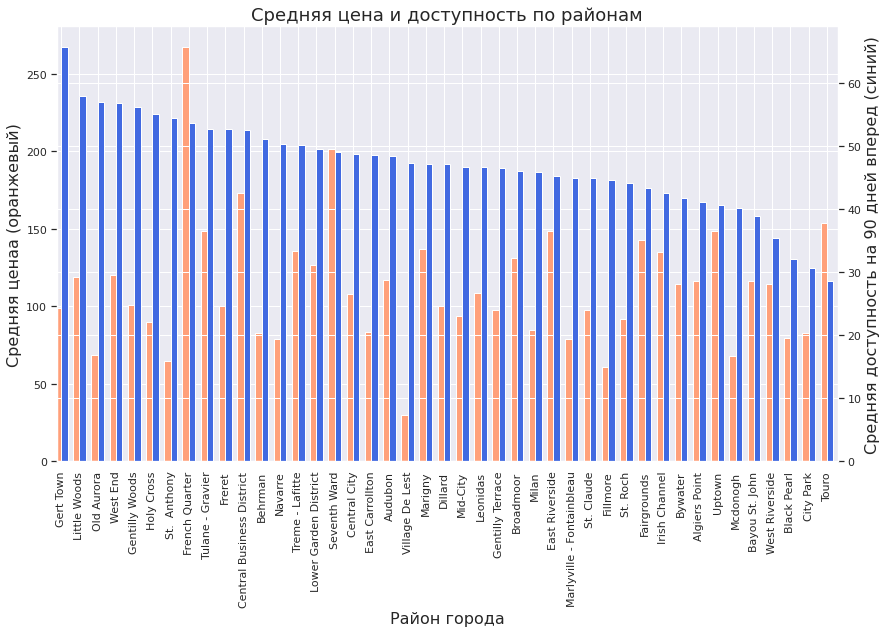

In [55]:
sns.set(rc={'figure.figsize':(14,8)})

fig = plt.figure()

plt.title(label="Средняя цена и доступность по районам",
          fontsize=18)

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.35
m90Price.avPrice.plot(kind='bar', color='lightsalmon', ax=ax, width=width, position=1)
m90Price.availability_90.plot(kind='bar', color='royalblue', ax=ax2, width=width, position=0)

ax2.set_ylabel('Средняя доступность на 90 дней вперед (синий)', fontsize=16)
ax.set_ylabel('Средняя ценаа (оранжевый)',  fontsize=16)

ax.set_xlabel('Район города',  fontsize=16)
plt.show()

Из этого графика видно, что последние 3 района, а именно Black Pearl, City Park и Touro являются потенциально хорошими местами для размещения рекламы и продвижения объявлений, так как доступность ниже. Высокую среднюю цену можно считать предпосылкой к большому доходу для Airbnb.

### **6.2 Какой вариант размещения должен активнее продвигаться компанией?**

Конечно, Airbnb предоставляет не только один тип квартир. Существует множество различных вариантов размещения. Это важная информация в сочетании с местоположением, может быть использована для того, чтобы принять решение относительно содержания рекламы, которая привлечет наибольшее количество клиентов Aribnb в Новом Орлеане.

В этом разделе будет изучена доступность жилья, рассмотрены некоторые важные переменные, касающиеся вариантов размещения (дом, квартира и т.д.), типа помещений (частная, общая и т.д.) и количества людей, разрешенное в жилье (2, 3 и т.д.).

В общих чертах стратегия, которой я буду придерживаться, будет включать в себя следующиие этапы: проведение предварительного анализа данных, регрессионный анализ со значением доступности в качестве целевой переменной, и, наконец, изучение коэффициентов и определение переменной, которая оказывает большее влияние на предсказание о доступности.

In [56]:
len(nol_data['property_type'].unique())

52

In [57]:
est_types = nol_data.pivot_table(columns=['property_type'], aggfunc='size').sort_values(ascending=False)
est_types

property_type
Entire residential home                2093
Entire rental unit                     1635
Entire condominium (condo)              562
Private room in residential home        388
Entire guest suite                      235
Entire townhouse                        184
Entire guesthouse                       136
Room in boutique hotel                  124
Entire cottage                           79
Private room in rental unit              77
Private room in bed and breakfast        72
Room in hotel                            62
Private room in guest suite              57
Entire loft                              52
Entire serviced apartment                35
Entire villa                             29
Shared room in residential home          23
Room in bed and breakfast                23
Entire bungalow                          21
Room in aparthotel                       14
Private room in resort                   13
Private room in townhouse                11
Tiny house        

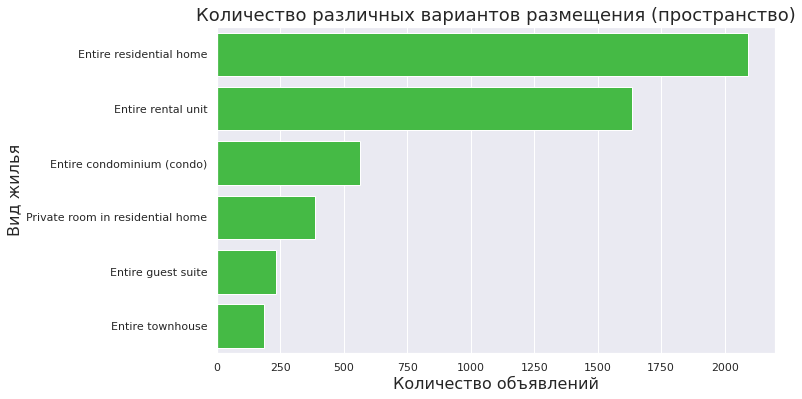

In [58]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=list(est_types.values)[0:6], y=list(est_types.index)[0:6], color='limegreen')
ax.set_title("Количество различных вариантов размещения (пространство)", fontsize=18)
plt.xlabel('Количество объявлений', fontsize=16)
plt.ylabel('Вид жилья', fontsize=16)
plt.show()

In [59]:
len(nol_data['room_type'].unique())

4

Существует четыре различных типа помещений.

Необходимо посчитать, сколько существует рекламных объявлений для каждого типа.

In [60]:
area_types = nol_data.pivot_table(columns=['room_type'], aggfunc='size').sort_values(ascending=False)
area_types

room_type
Entire home/apt    5096
Private room        812
Hotel room           61
Shared room          37
dtype: int64

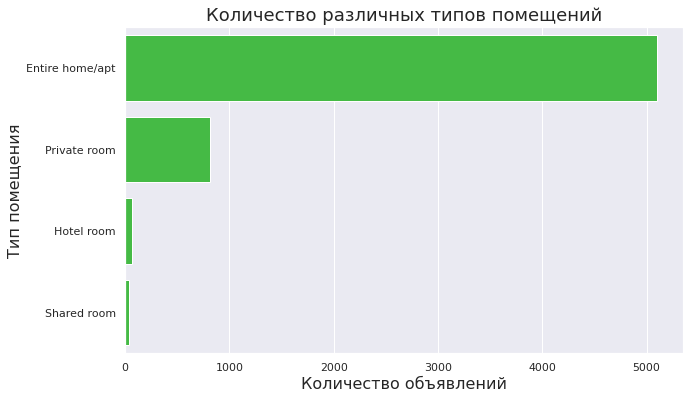

In [61]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=list(area_types.values), y=list(area_types.index), color='limegreen')
ax.set_title("Количество различных типов помещений", fontsize=18)
plt.xlabel('Количество объявлений', fontsize=16)
plt.ylabel('Тип помещения', fontsize=16)
plt.show()

In [62]:
len(nol_data['accommodates'].unique())

16

Существует 16 вариантов размещения по допустимому количеству человек.

Необходимо посчитать, сколько существует рекламных объявлений для каждого варианта.

In [63]:
res_fig = nol_data.pivot_table(columns=['accommodates'], aggfunc='size')
res_fig

accommodates
1       77
2     1588
3      227
4     1614
5      187
6     1166
7       67
8      506
9       26
10     340
11       8
12      65
13       9
14      25
15      12
16      89
dtype: int64

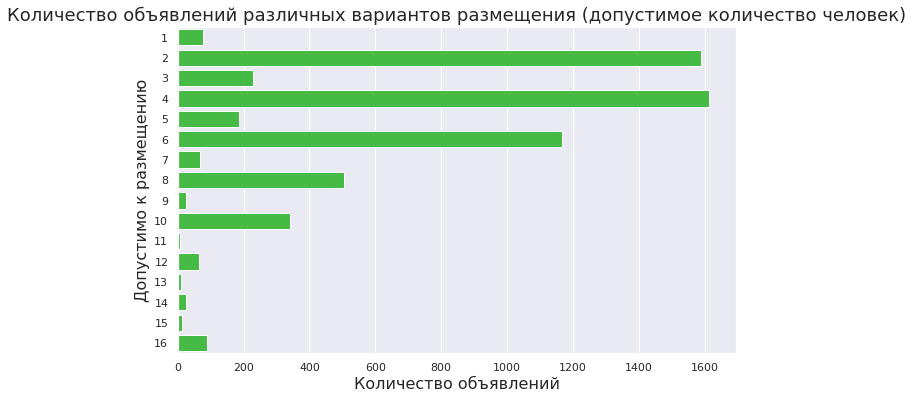

In [64]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=list(res_fig.values), y=[str(x) for x in res_fig.index], color='limegreen')
ax.set_title("Количество объявлений различных вариантов размещения (допустимое количество человек)", fontsize=18)
plt.xlabel('Количество объявлений', fontsize=16)
plt.ylabel('Допустимо к размещению', fontsize=16)
plt.show()

Следующим шагом необходимо подготовить данные для проведения регрессионного анализа. Следует произвести сокращение количества категорий, связанных с вариантами размещения (пространство), а также вариантами размещения (допустимое количество человек). Затем будет проведено преобразование категорий в фиктивные переменные.

In [65]:
sup_data = nol_data[['property_type', 'room_type','accommodates','availability_90']]

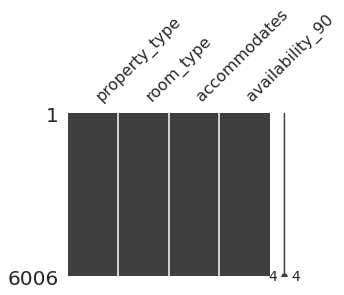

In [66]:
msno.matrix(sup_data, figsize=(4, 3))

In [67]:
sup_data.isnull().sum()/len(sup_data)

property_type      0.0
room_type          0.0
accommodates       0.0
availability_90    0.0
dtype: float64

In [69]:
et = sup_data.pivot_table(columns=['property_type'], aggfunc='size')
pt_matrix = []
for i in range(len(et)):
    pt_matrix.append([et.index[i], et.values[i]])
for t in pt_matrix:
    if (t[1]<60):
        sup_data['property_type'] = sup_data['property_type'].replace(t[0],'Others')

In [70]:
est_types_2 = sup_data.pivot_table(columns=['property_type'], aggfunc='size').sort_values(ascending=False)
est_types_2

property_type
Entire residential home              2093
Entire rental unit                   1635
Entire condominium (condo)            562
Private room in residential home      388
Others                                359
Entire guest suite                    235
Entire townhouse                      184
Entire guesthouse                     136
Room in boutique hotel                124
Entire cottage                         79
Private room in rental unit            77
Private room in bed and breakfast      72
Room in hotel                          62
dtype: int64

In [71]:
ref = sup_data['accommodates']
ref_matrix = []
for i in range(len(ref)):
    ref_matrix.append([ref.index[i], ref.values[i]])
for a in ref_matrix:
    if (type(a[1])==int):
        if (a[1]>10):
            sup_data['accommodates'][a[0]]=='extra_10'

In [72]:
for num in [k for k in [x for x in list(sup_data['accommodates'].unique()) if (x != 'Others')] if (k>10)]:
    sup_data['accommodates'] = sup_data['accommodates'].replace(num, 'extra_10')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [73]:
res_num_2 = sup_data.pivot_table(columns=['accommodates'], aggfunc='size')
res_num_2

accommodates
1             77
2           1588
3            227
4           1614
5            187
6           1166
7             67
8            506
9             26
10           340
extra_10     208
dtype: int64

In [74]:
sup_data = pd.get_dummies(sup_data, columns=["property_type"], prefix=["Prop_type"])
sup_data = pd.get_dummies(sup_data, columns=["accommodates"], prefix=["Accom"])
sup_data = pd.get_dummies(sup_data, columns=["room_type"], prefix=["Room_type"])
sup_data

,availability_90,Prop_type_Entire condominium (condo),Prop_type_Entire cottage,Prop_type_Entire guest suite,Prop_type_Entire guesthouse,Prop_type_Entire rental unit,Prop_type_Entire residential home,Prop_type_Entire townhouse,Prop_type_Others,Prop_type_Private room in bed and breakfast,...,Accom_6,Accom_7,Accom_8,Accom_9,Accom_10,Accom_extra_10,Room_type_Entire home/apt,Room_type_Hotel room,Room_type_Private room,Room_type_Shared room
0,34,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,68,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6024,88,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6025,78,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6026,87,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Создание тепловой карты можно назвать простым способом увидеть корреляцию, но она может дать больше информации, чем это необходимо. Поскольку используемый по умолчанию коэффициент корреляции Пирсона нельзя назвать самым подходящим, позже необходимо измерить корреляцию другим способом.

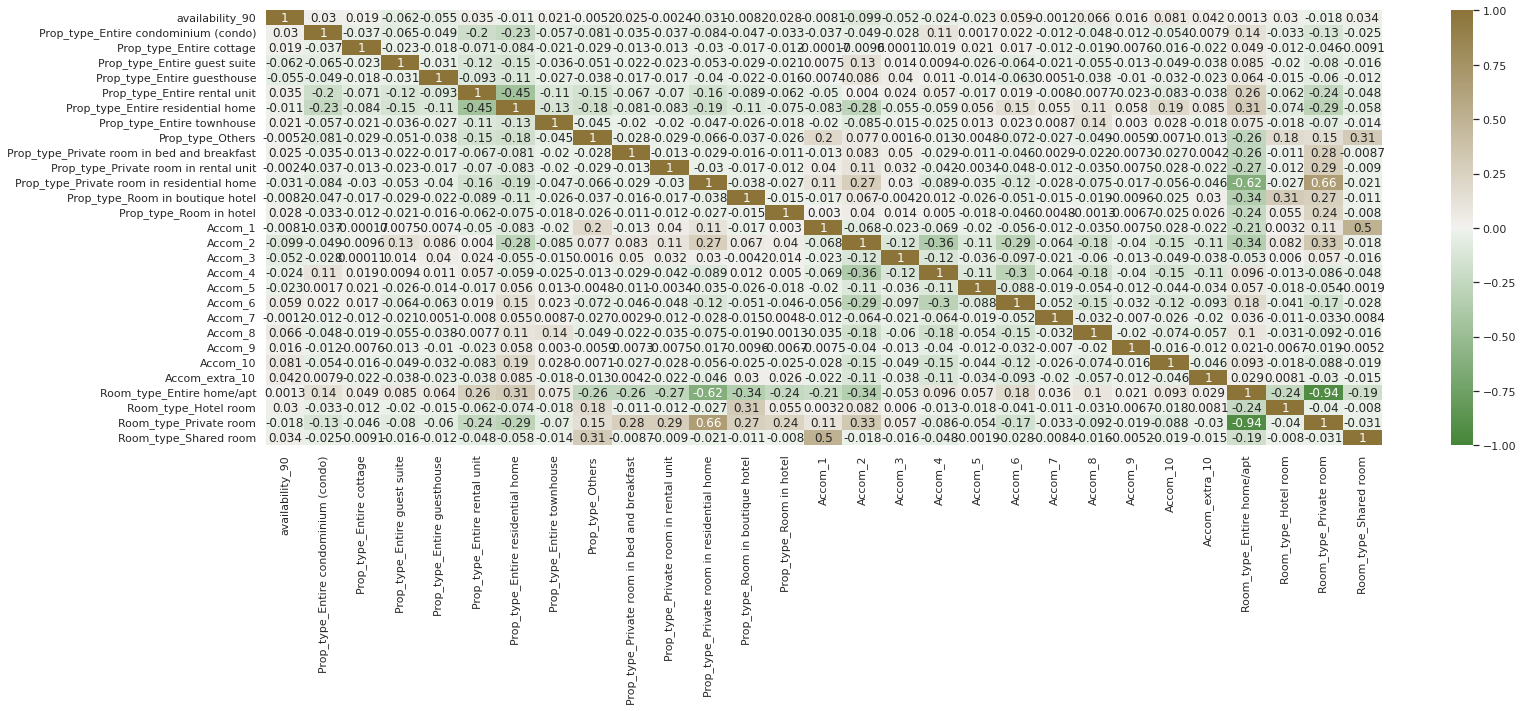

In [75]:
interlink = sup_data.corr()
sns.set(rc={'figure.figsize':(25,8)})
plt.figure()
sns.heatmap(interlink, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(124, 64, as_cmap=True))

Мы видим, что корреляция между различными вариантами размещения и availability_90 довольно слабая. Можно выделить атрибуты: Room_type_Private_room, Room_type_Hotel_room и Room_type_Entire home/apt.

Однако на данном этапе сделанные выводы могут оказаться преждевременными.

Для расчета корреляции можно воспользоваться коэффициентом точечно-бисериальной корреляции. Это коэффициент хорошо подходит для категорических данных, каковым является наш случай.

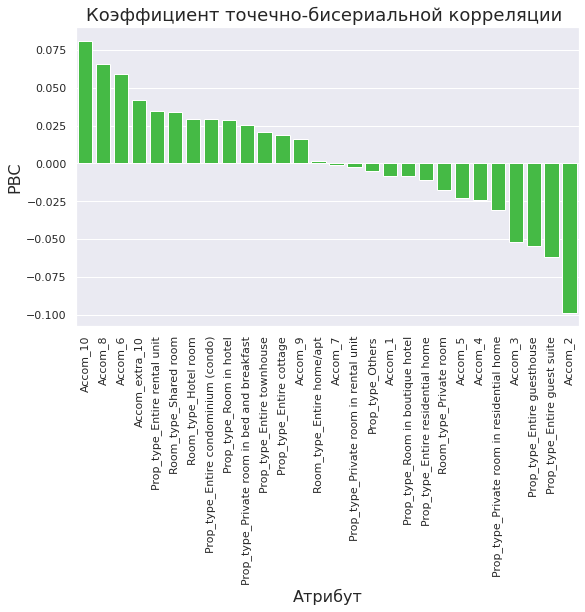

In [95]:
avbl = sup_data['availability_90']
pbcs = []

for i in range(len(sup_data.columns)-1):
    catvar = sup_data[sup_data.columns[i+1]]
    pbc = pointbiserialr(catvar, avbl)[0]
    pbcs.append(pbc)
    
pbc_data = pd.DataFrame(list(zip(sup_data.columns[1:], pbcs)), columns =['Attributes', 'PBC'])
pbc_prop = pbc_data[0:13]
pbc_acc = pbc_data[13:24]
pbc_room = pbc_data[24:]
pbc_data = pbc_data.sort_values(by='PBC', ascending=False)

sns.set(rc={'figure.figsize':(9,5.5)})
ax = sns.barplot(y=pbc_data['PBC'], x=pbc_data['Attributes'], color='limegreen')
ax.set_title("Коэффициент точечно-бисериальной корреляции ", fontsize=18)
plt.xlabel('Атрибут', fontsize=16)
plt.ylabel('PBC', fontsize=16)
plt.xticks(rotation=90)
plt.show()

Важно понимать, что если наблюдается положительная корреляция, то вероятность того, что конкретный вариант проживания будет доступен, выше. Таким образом, Airbnb необходимо обратить внимание на отрицательно коррелирующие атрибуты, если идет речь о выборе варианта проживания для его продвижения.

Можно сделать результаты еще более наглядными, если разделить их на разные блоки: один для варианта размещения, другой для типа помещения и третий для допустимого количества человек.

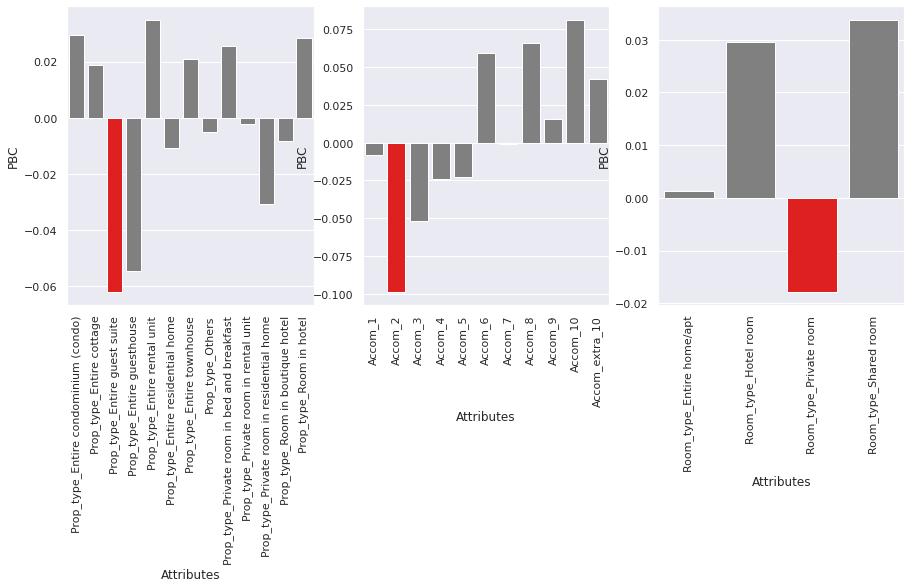

In [96]:
sns.set(rc={'figure.figsize':(15,5.5)})
fig, axs = plt.subplots(ncols=3)
clrs_1 = ['grey' if (x > min(pbc_prop['PBC'])) else 'red' for x in pbc_prop['PBC'] ]
clrs_2 = ['grey' if (x > min(pbc_acc['PBC'])) else 'red' for x in pbc_acc['PBC'] ]
clrs_3 = ['grey' if (x > min(pbc_room['PBC'])) else 'red' for x in pbc_room['PBC'] ]
sns.barplot(y=pbc_prop['PBC'], x=pbc_prop['Attributes'], palette=clrs_1,  data=pbc_prop, ax=axs[0])
sns.barplot(y=pbc_acc['PBC'], x=pbc_acc['Attributes'], palette=clrs_2,  data=pbc_acc, ax=axs[1])
sns.barplot(y=pbc_room['PBC'], x=pbc_room['Attributes'], palette=clrs_3,  data=pbc_room, ax=axs[2])
axs[0].set_xticklabels(axs[0].get_xmajorticklabels(), rotation=90)
axs[1].set_xticklabels(axs[1].get_xmajorticklabels(), rotation=90)
axs[2].set_xticklabels(axs[2].get_xmajorticklabels(), rotation=90)
plt.show()

Атрибуты, которые относятся к выделенным красным столбцам (на гистограмме), являются потенциально хорошими характеристиками для их использования в поиске путей улучшения опыта клиентов в Airbnb, если цель состоит в том, чтобы привлечь больше людей и, таким образом, получить меньшее значение доступности.

Далее рассматриваемые результаты необходимо сравнить с теми, что были получены при помощи другого метода. Для этих целей был выбран ансамблевый метод Random Forest Regressor.

In [97]:
y_reg = sup_data['availability_90']
x_reg = sup_data[sup_data.columns[1:]]
Xtrn, Xtest, Ytrn, Ytest = train_test_split(x_reg, y_reg, test_size=0.2, random_state=123)

print("Training feature set size:",Xtrn.shape)
print("Test feature set size:",Xtest.shape)
print("Training variable set size:",Ytrn.shape)
print("Test variable set size:",Ytest.shape)

Training feature set size: (4804, 28)
Test feature set size: (1202, 28)
Training variable set size: (4804,)
Test variable set size: (1202,)


In [98]:
regressor = RandomForestRegressor(n_estimators=10, random_state=123)
regressor.fit(Xtrn, Ytrn)

y_pred = regressor.predict(Xtest)
y_pred_trn = regressor.predict(Xtrn)
R2trn = r2_score(Ytrn, y_pred_trn)
R2test = r2_score(Ytest, y_pred)

print("-"*80)
print('Коэффициент детерминации (обучающая):', R2trn)
print('Коэффициент детерминации (тестовая):', R2test)
print("-"*80)

--------------------------------------------------------------------------------
Коэффициент детерминации (обучающая): 0.07171387017884656
Коэффициент детерминации (тестовая): 0.03712729709153184
--------------------------------------------------------------------------------


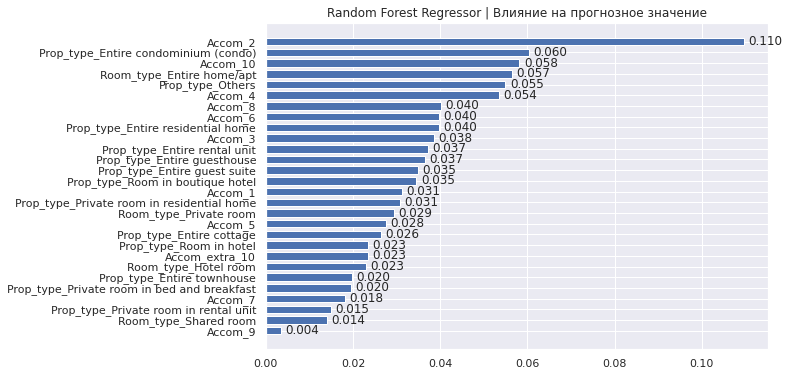

In [99]:
plt.rcParams["figure.figsize"] = (9,6)
sorted_index = regressor.feature_importances_.argsort()
parameters = list(Xtrn.columns)
plt.barh([parameters[i] for i in sorted_index], regressor.feature_importances_[sorted_index], height=.7)
plt.title('Random Forest Regressor | Влияние на прогнозное значение')
for x, y_ in zip(regressor.feature_importances_[sorted_index], np.arange(len(parameters))):
    plt.text(x + .001, y_, f'{x:.3f}', va='center')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

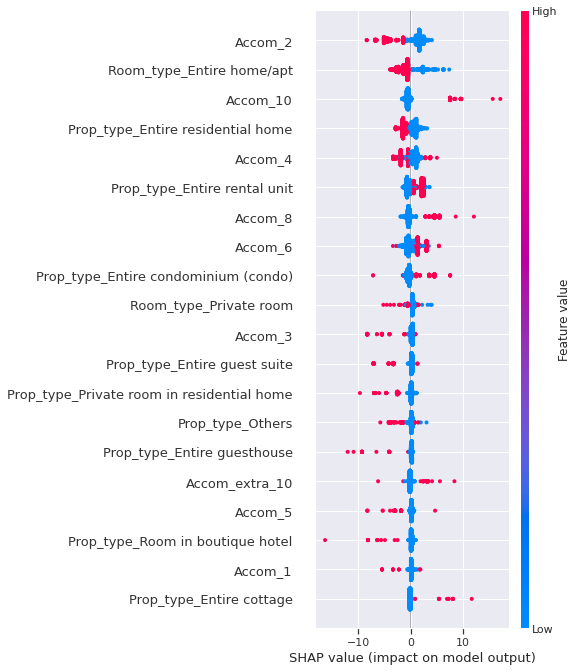

In [100]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest)

Извлеченные ранее результаты в целом согласуются с результатами, полученными с помощью PB Correlation. Например, можно наблюдать, что атрибут, выражающий доступное количество человек (2), который был одной из наиболее важных характеристик, отрицательно влияет на результаты модели, что можно интерпретировать как отрицательную корреляцию с доступностью. Кроме того, квартира, как вариант размещения, также отрицательно влияет на модель.

### **6.3 Предложения и рекомендации для Airbnb**

Суммируя результаты, полученные в ходе предыдущего анализа, можно дать следующие рекомендации Airbnb, если цель компании — заработать больше денег:

**Общие факты и рекомендации**

**Хорошее место для продвижения опыта проживания «как дома» вдали от дома:** принимая во внимание среднюю цену за ночь и среднюю доступность в течение 90 дней, можно выделить три потенциально хороших варианта (района) для продвижения: Black Pearl, City Park и Touro.

**Характеристики, ведущие к большему количеству бронирований:** анализируя корреляцию с наличием свободных мест в течение 90 дней, можно выделить следующие характеристики, которые повышают вероятность того, что человек воспользуется сервисом бронирования: вариант размещения (гостевой сьют, гостевой дом), доступное количество проживающих (2 человека), тип помещения (отдельная комната).

**Другие интересные факты**

Количество объявлений не распределено по районам равномерно. В некоторых из них доступно от 10 до 30 раз больше предложений, чем в других.

Район, в котором в среднем в течение 90 дней располагает большим количеством свободных мест, — Pontchartrain Park (около 82 дней из 90). И наоборот, район с наименьшей доступностью— Touro (около 29 дней из 90).

Средняя цена за ночь (для 3 человек) выше в центральных районах (около 200-270 долларов). И наоборот, самое дешевое жилье находится в Village De Lest (около 30 долларов).

Большинство вариантов размещения — жилые дома (около 35%).

Большинство типов номеров - это целые дома/квартиры (около 85%).